Docs:
* https://www.gymlibrary.dev/environments/box2d/car_racing/

Installs: 
* Swig
* bo2x 
* pyglet

In [18]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import os

In [19]:
# show frames in ipynb
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

def show_frame(env):
    # Capture frame as RGB array
    frame = env.render()
    plt.imshow(frame)
    display(plt.gcf())
    clear_output(wait=True)

In [20]:
enviroment_name = 'CarRacing'
env = gym.make(enviroment_name, render_mode="rgb_array")

C:\Users\safho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gymnasium\envs\registration.py:525: UserWarning: WARN: Using the latest versioned environment `CarRacing-v3` instead of the unversioned environment `CarRacing`.
  logger.warn(


In [21]:
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {})

In [22]:
env.action_space #box with 3 different values -1, 0, 1

Box([-1.  0.  0.], 1.0, (3,), float32)

In [23]:
env.observation_space # image 96x96x3 from 0 255 vals

Box(0, 255, (96, 96, 3), uint8)

In [24]:
for episode in range(0):
    obs = env.reset()
    done = False
    score = 0
    
    while not done:
        action = env.action_space.sample() # random random sample
        obs, reward, done, trunc, info = env.step(action)
        
        score += reward
        
    print(f'Ep: {episode}, Score" {score}')
    
    env.close()

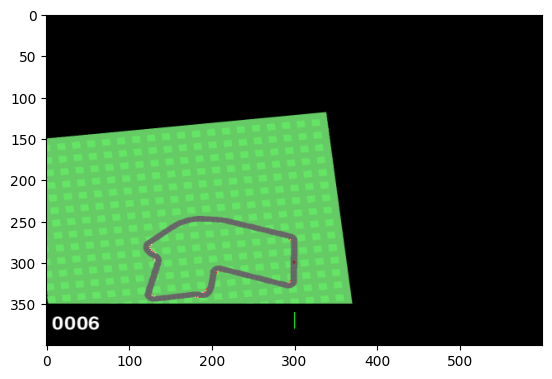

In [25]:
plt.imshow(env.render())

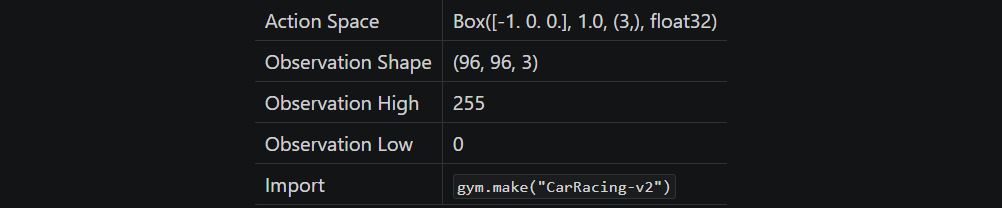

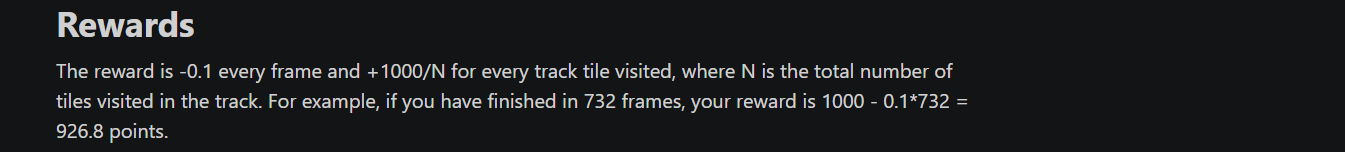

* DummyVecEnv: wrapper making multiple environments look like a single env
* SubprocVecEnv: start multiple environments in parallel
* ThreadVecEnv: start multiple environments in parallel in threads
* VecVideoRecorder: record videos of the environments

In [26]:
# def make_env(num_envs):
#     envs = []
#     for _ in range(num_envs):
#         envs.append(gym.make(enviroment_name, render_mode='human'))

# env = DummyVecEnv([lambda: gym.make(enviroment_name)]) # need to do as this, as the envs cant be the same

* Instead of DummyVec you can use SubprocessVec where you can do multiple at once
    * `env = SubprocVecEnv([lambda: gym.make(enviroment_name) for _ in range(8)])`
    * Must put in `if __name__ == '__main__':`

* When using GPU, by doing `model = PPO('CnnPolicy', env, device='cuda')`
    * Instead of being **1.2x** faster than cpu its **3.19x** 

In [27]:
if __name__ == '__main__':
    env = SubprocVecEnv([lambda: gym.make(enviroment_name) for _ in range(8)])

In [28]:
# CnnPolicy is used for images
# MlpPolicy is used for non-image data
# MultiInputPolicy for multiple polocies
# other policy: https://stable-baselines3.readthedocs.io/en/master/guide/custom_policy.html

model = PPO('CnnPolicy', env, tensorboard_log='logs', verbose=1, device='cuda') 
# learning_rate: its the step size of optimizer (default 3e-4)
# n_steps: number of steps to run, higher the value, more accurate the value, but slower the training
# batch_size: number of samples to train on, higher the value, more accurate the value, but slower the training
# n_epochs: number of epochs to train the model, default is 10
# gamma: discount factor, default is 0.99, human terms: how much we care about future rewards
# gae_lambda: how much we care about future rewards, default is 0.95
# clip_range: how much to clip the gradient, default is 0.2, higher the value, clipping is used to prevent the model from learning too fast, higher = slower learning
# ent_coef: entropy coefficient, default is 0.01, higher the value, more exploration, lower the value, more exploitation
# vf_coef: value function coefficient, default is 0.5, how much to care about value function
# max_grad_norm: maximum gradient norm, default is 0.5, higher the value, more aggressive the learning

# device = 'cuda' runs on GPU, ~ 3x faster than cpu

Using cuda device
Wrapping the env in a VecTransposeImage.


In [29]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

treshold = 900

eval_callback = EvalCallback(
    env,
    StopTrainingOnRewardThreshold(treshold, verbose=1),
    eval_freq=100000,
    n_eval_episodes=5,
    verbose=1
)

In [ ]:
try:
    PPO.load('models\\sub_8_model.zip')
except:
    print('No previous model found.')

In [31]:
model.learn(total_timesteps=500_000)

model.save('models')

Logging to logs\PPO_9
------------------------------
| time/              |       |
|    fps             | 596   |
|    iterations      | 1     |
|    time_elapsed    | 27    |
|    total_timesteps | 16384 |
------------------------------


KeyboardInterrupt: 

In [15]:
mean_reward, std_reward = evaluate_policy(model, env, render=False)

C:\Users\safho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [16]:
mean_reward, std_reward = evaluate_policy(model, env, render=False)

print(f'Mean Reward: {mean_reward}, Standard Deviation: {std_reward}')

Mean Reward: -52.28733264193319, Standard Deviation: 20.581856978294542


In [18]:
evaluate_policy(model, env, 5, render=True)

C:\Users\safho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
C:\Users\safho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


(-50.691087788027154, 21.744521143971387)